# CV Photonics Toy

Validate the ether-phase unitary via a Mach–Zehnder with a coherent state.
- Small-φ expansion check
- Convergence vs truncation n_max


In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

import numpy as np
from sec5.src.cv_phase import mzi_output_means, ideal_mzi_output_means, small_phi_residual


In [2]:
alpha = 1.0 + 0.0j
phis = np.linspace(0, 0.02, 21)
nmax_list = [10, 20, 40, 80]


In [3]:
residuals = {}
for nmax in nmax_list:
    res = [small_phi_residual(alpha, float(phi), nmax) for phi in phis]
    residuals[nmax] = res
residuals


{10: [1.013777127800708e-07,
  1.0137746401037202e-07,
  1.0137646734498697e-07,
  1.0137397249032967e-07,
  1.0136872987602716e-07,
  1.0135898986839004e-07,
  1.0134250098091588e-07,
  1.013165155195925e-07,
  1.0127778134655448e-07,
  1.012225482950487e-07,
  1.0114656769724446e-07,
  1.0104508802239524e-07,
  1.0091285850500466e-07,
  1.0074412832827711e-07,
  1.0053264791331803e-07,
  1.0027166398704088e-07,
  9.995392630419186e-08,
  9.957168259671483e-08,
  9.911668106925171e-08,
  9.858016767249671e-08,
  9.795289025671528e-08],
 20: [2.220446049250313e-16,
  2.0983220411220562e-14,
  3.334003076952422e-13,
  1.6878758620583151e-12,
  5.33353274443023e-12,
  1.3021110081649234e-11,
  2.7000311850178145e-11,
  5.002126704579789e-11,
  8.53343282672689e-11,
  1.3668998507267067e-10,
  2.0833778185933988e-10,
  3.0502879228201307e-10,
  4.3201287926331367e-10,
  5.95042842336701e-10,
  8.003669109855019e-10,
  1.054738894966724e-09,
  1.3654094638234323e-09,
  1.7401296430932426e-

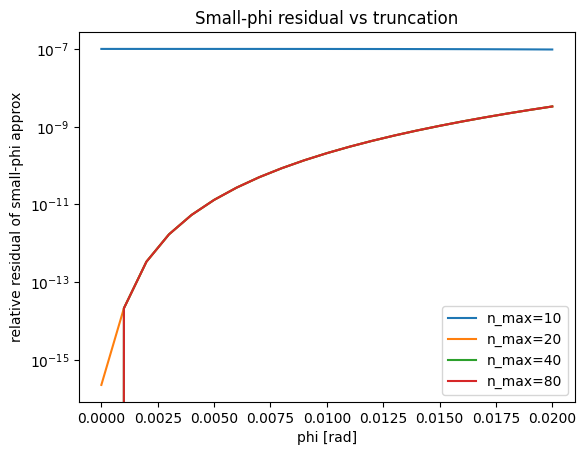

In [4]:
from matplotlib import pyplot as plt
plt.figure()
for nmax in nmax_list:
    plt.plot(phis, residuals[nmax], label=f'n_max={nmax}')
plt.yscale('log')
plt.xlabel('phi [rad]')
plt.ylabel('relative residual of small-phi approx')
plt.title('Small-phi residual vs truncation')
plt.legend()
plt.show()


In [5]:
phi = 0.5
true_n0, true_n1 = ideal_mzi_output_means(alpha, phi)
for nmax in nmax_list:
    n0, n1 = mzi_output_means(alpha, phi, nmax)
    print(nmax, 'err n0=', abs(n0-true_n0), 'err n1=', abs(n1-true_n1))


10 err n0= 5.3800290000793893e-08 err n1= 2.7755575615628914e-17
20 err n0= 1.1102230246251565e-16 err n1= 1.3877787807814457e-17
40 err n0= 1.1102230246251565e-16 err n1= 1.3877787807814457e-17
80 err n0= 1.1102230246251565e-16 err n1= 1.3877787807814457e-17
